# ConfIDent analytics

In [1]:
# import libraries
import requests
import pandas as pd
from json.decoder import JSONDecodeError
import matplotlib.pyplot as plt
import squarify

Import metadata from ConfIDent via ASK API and write everything in a dataframe for further processing and analytics. Print head to evaluate the results.

In [2]:
# Paramaters
base_url = "https://www.confident-conference.org/index.php?title=Special:Ask&format=json&prettyprint=true&unescape=true&searchlabel=JSON&sort=&order=asc"
query_params = "&x=-5B-5BConcept%3AEvents-5D-5D-20-5B-5BHas-20subobject.Organization%3A%3A%2B-5D-5D%2F-3FAcademic-20Field%3Dsubject%2F-3FAcronym%3Dacronym%2F-3FTitle%3Dtitle%2F-3FHas-20subobject.Organization%3Dcreator%2F-3FIn-20Event-20Series.DOI%3Din-5Fseries-5Fdoi%2F-3FIn-20Event-20Series%3Din-5Fseries%2F-3FStart-20Date%3Dstart-5Fdate%2F-3FEnd-20Date%3Dend-5Fdate%2F-3FEvent-20Mode%3Devent-5Fmode%2F-3FVenue%3Dvenue%2F-3FCity%3Dcity%2F-3FRegion%3Dregion%2F-3FCountry%3Dcountry%2F-3FOfficial-20Website%3Dwebsite%2F-3FDOI%3Ddoi"

limit = 500
offset = 0

# Create list to store granular event metadata
events_data = []

while True:
    try:
        # Construct the URL with paging parameters
        url = f"{base_url}{query_params}&limit={limit}&offset={offset}"
        
        # Fetching the data from the API
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for HTTP errors
        
        # Attempt to parse JSON data
        data = response.json()
        
        # Extract the "results" part
        results = data.get("results", {})
        
        # If no more results are returned, break the loop
        if not results:
            break
    
        # Process each event
        for event_id, event_data in results.items():
            printouts = event_data.get("printouts", {})
            
            # Extract relevant fields, handling lists and dictionaries where necessary
            subject = ", ".join([sub["fulltext"] for sub in printouts.get("subject", [])])
            acronym = ", ".join(printouts.get("acronym", []))
            title = ", ".join(printouts.get("title", []))
            creator = ", ".join([creator["fulltext"] for creator in printouts.get("creator", [])])
            in_series_doi = ", ".join(printouts.get("in_series_doi", []))
            in_series = ", ".join([series["fulltext"] for series in printouts.get("in_series", [])])
            start_date = ", ".join([date["raw"] for date in printouts.get("start_date", [])])
            end_date = ", ".join([date["raw"] for date in printouts.get("end_date", [])])
            event_mode = ", ".join(printouts.get("event_mode", []))
            venue = ", ".join(printouts.get("venue", []))
            city = ", ".join(printouts.get("city", []))
            region = ", ".join(printouts.get("region", []))
            country = ", ".join([country["fulltext"] for country in printouts.get("country", [])])
            website = ", ".join(printouts.get("website", []))
            doi = ", ".join(printouts.get("doi", []))
            
            # Append the extracted data to the events_data list
            events_data.append({
                "event_id": event_id,
                "subject": subject,
                "acronym": acronym,
                "title": title,
                "creator": creator,
                "in_series_doi": in_series_doi,
                "in_series": in_series,
                "start_date": start_date,
                "end_date": end_date,
                "event_mode": event_mode,
                "venue": venue,
                "city": city,
                "region": region,
                "country": country,
                "website": website,
                "doi": doi
            })
        
        # Pogress updates
        print(f"Page with offset {offset} successfully read.")
        
        # Set offset to get the next page of results
        offset += limit
    
    except requests.RequestException as e:
        print("Request failed:", e)
        break  # Exit loop if there is a request exception
    
    except JSONDecodeError as e:
        print("Failed to decode JSON data:", e)
        break  # Exit loop if there is a JSON decoding error

# Create df with events
df = pd.DataFrame(events_data)

# Print head
print(df.head())


Page with offset 0 successfully read.
Page with offset 500 successfully read.
Page with offset 1000 successfully read.
Page with offset 1500 successfully read.
Page with offset 2000 successfully read.
Page with offset 2500 successfully read.
Page with offset 3000 successfully read.
Page with offset 3500 successfully read.
Page with offset 4000 successfully read.
Page with offset 4500 successfully read.
Page with offset 5000 successfully read.
Page with offset 5500 successfully read.
Page with offset 6000 successfully read.
Page with offset 6500 successfully read.
Page with offset 7000 successfully read.
Page with offset 7500 successfully read.
Page with offset 8000 successfully read.
Page with offset 8500 successfully read.
Page with offset 9000 successfully read.
Request failed: Expecting value: line 1 column 1 (char 0)
                                     event_id  \
0  Event:Fb125687-356e-4e27-9537-1697e6325e1b   
1  Event:C5dba1c7-e977-4d65-93f8-f210285c3a1d   
2  Event:7d2b5469-65

Clean metadata, and calculate counts

In [18]:
# Remove "Country:"
df['country'] = df['country'].str.replace('Country:', '')

country_counts = df['country'].value_counts()

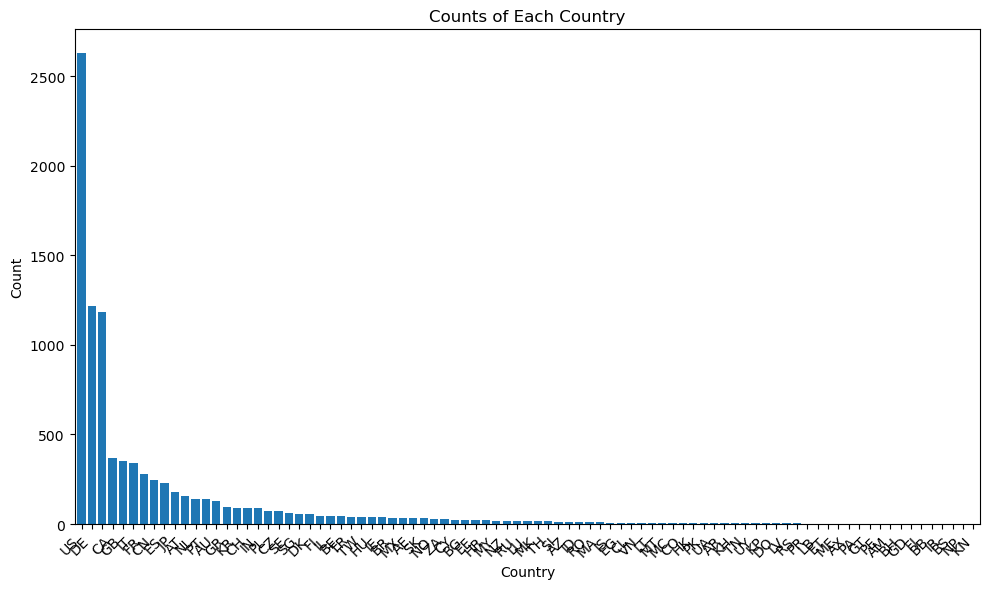

In [19]:
# Create barchart of counts for each country
plt.figure(figsize=(10, 6))  # figure size
country_counts.plot(kind='bar', width=0.8)  # width of bars
plt.title('Counts of Each Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels of x-axis 
plt.tight_layout()  # spacing
plt.show()

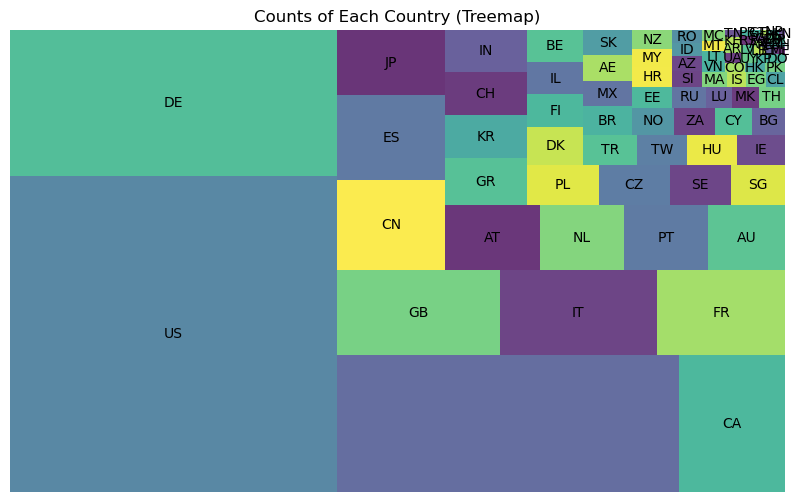

In [21]:
# Plotting the treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=country_counts, label=country_counts.index, alpha=0.8)

plt.title('Counts of Each Country (Treemap)')
plt.axis('off')  # Turn off axis
plt.show()


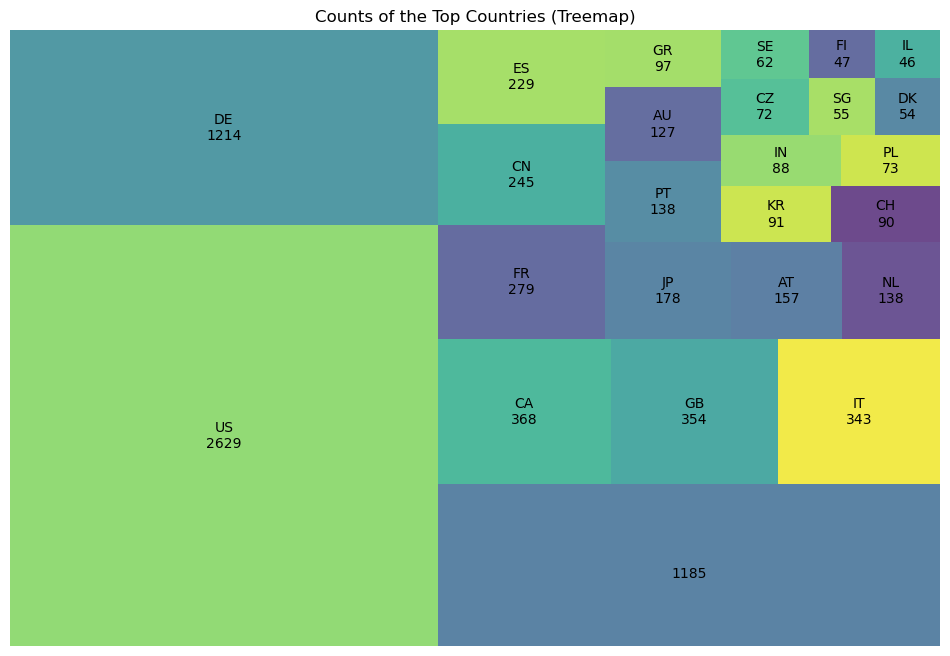

In [26]:
# Select the top 25 countries by count
top_countries = country_counts.nlargest(25)

# Plotting the treemap for the top countries
plt.figure(figsize=(12, 8))
squarify.plot(sizes=top_countries, label=top_countries.index + "\n" + top_countries.astype(str), alpha=0.8)
plt.title('Counts of the Top Countries (Treemap)')
plt.axis('off')  # Turn off axis
plt.show()